---
title: STATS 3DA3
subtitle: Homework Assignment 6
author: 
  - "Yishuang Meng (Student Number: 400320988)"
  - "Yuren Wang (Student Number: 400229756)"
  - "Shiheng Huang (Student Number: 400233642)"
date: 04/17/2024
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true
fontsize: 11pt
geometry: margin = 1in
linestretch: 1.5
bibliography: Assignment6.bib
nocite: '@*'
---

\newpage

## Chronic Kidney Disease Classification Challenge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, mean_squared_error
from sklearn.metrics.cluster import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
sns.set(rc={"figure.figsize":(10, 6)})
plt.figure(figsize= (10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

\newpage

### Import dataset

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
# print(chronic_kidney_disease.metadata) 
  
# variable information 
# print(chronic_kidney_disease.variables) 

In [3]:
X['dm'] = X['dm'].replace({'\tno':'no'})
y = y.replace({'ckd\t':'ckd'})
y = y.replace({'ckd':1, 'notckd':0})

### Question 1

In [4]:
print(f'Printing first 5 rows: \n\n {X.head()}.')

Printing first 5 rows: 

     age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo   pcv    wbcc  rbcc  htn   dm cad appet  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44.0  7800.0   5.2  yes  yes  no  good   
1    NaN  18.0  0.8    NaN  NaN  11.3  38.0  6000.0   NaN   no   no  no  good   
2  423.0  53.0  1.8    NaN  NaN   9.6  31.0  7500.0   NaN   no  yes  no  poor   
3  117.0  56.0  3.8  111.0  2.5  11.2  32.0  6700.0   3.9  yes   no  no  poor   
4  106.0  26.0  1.4    NaN  NaN  11.6  35.0  7300.0   4.6   no   no  no  good   

    pe  ane  
0   no   no  
1 

In [5]:
print(f" Printing predictors information: \n\n {X.info()}.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [6]:
print(f"Printing predictors statistics: \n\n {X.describe()}.")

Printing predictors statistics: 

               age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.88

The objective of this data set is to predict whether a patient has chronic kidney disease based on various clinical features.

The variables are:
- Demographics: Age, Blood Pressure (bp)
- Specific Gravity (sg): A measure related to the density of urine.
- Albumin Levels (al), Sugar Levels (su): Indicators in the urine suggesting kidney function.
- Red Blood Cell Count (rbc), Pus Cell (pc), and other cellular compositions in the urine.
- Blood Glucose Random (bgr), Blood Urea (bu), Serum Creatinine (sc): Laboratory measurements indicating kidney function.
- Sodium (sod), Potassium (pot), Hemoglobin (hemo): Electrolyte levels and blood parameters.
- Hypertension (htn), Diabetes Mellitus (dm), Coronary Artery Disease (cad): Presence of these conditions which are risk factors for CKD.
- Appetite (appet), Pedal Edema (pe), Anemia (ane): Symptoms that are often associated with CKD.

And the classification problem we want to solve is whether the patient has chronic kidney disease or not.

### Question 2

In [7]:
#num_col = X.select_dtypes(include={'float64'}).columns
#obj_col = X.select_dtypes(include={'object'}).columns
int_col = ['age', 'bp', 'bgr', 'bu', 'sod', 'pcv', 'wbcc']
float_col = ['sc', 'pot', 'hemo', 'rbcc']
num_col = int_col + float_col
bin_col = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
cate_col = ['sg', 'al', 'su']

X[bin_col+cate_col] = X[bin_col+cate_col].astype('category')

# for cols, type in  zip([int_col, bin_col+cate_col], ['Int64', 'category']):
#     X[cols] = X[cols].astype(type)

binary_mapping = {
    'rbc':{'normal':1, 'abnormal':0},
    'pc' :{'normal':1, 'abnormal':0},
    'pcc' :{'present':1, 'notpresent':0},
    'ba' :{'present':1, 'notpresent':0},
    'htn':{'yes':1, 'no':0},
    'dm' :{'yes':1, 'no':0},
    'cad' :{'yes':1, 'no':0},
    'pe' :{'yes':1, 'no':0},
    'ane' :{'yes':1, 'no':0},
    'appet' :{'good':1, 'poor':0},
}

for column, binary_mapping in binary_mapping.items():
    X[column] = X[column].replace(binary_mapping)

In [8]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,1,0,0


In [9]:
X[num_col] = StandardScaler().fit_transform(X[num_col])
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,NaN,1,0,0,-0.341498,-0.424804,-0.326574,NaN,NaN,0.988022,0.569881,-0.206202,0.481295,1,1,0,1,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,NaN,1,0,0,NaN,-0.781687,-0.396338,NaN,NaN,-0.421688,-0.098536,-0.818559,NaN,0,0,0,1,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064,-0.087748,-0.221928,NaN,NaN,-1.006202,-0.878356,-0.308261,NaN,0,1,0,0,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,-0.028268,0.126891,-2.552778,-0.667102,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,0,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-0.530963,-0.623073,-0.291692,NaN,NaN,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,-0.167055,-0.448661,1.200069,0.085536,1.091172,0.904090,-0.580420,0.188159,0,0,0,1,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,-0.523939,-0.326574,0.334027,-0.353503,1.366237,1.683910,-0.206202,1.458415,0,0,0,1,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,-0.623073,-0.431220,-0.050880,-0.071263,1.125555,1.126896,-0.614440,0.676719,0,0,0,1,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,-0.147229,-0.361456,-0.243334,0.085536,0.575424,1.349701,-0.410321,1.165279,0,0,0,1,0,0


### Question 3

In [10]:
X.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,3.910000e+02,3.880000e+02,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02
mean,9.994847e-17,-2.380684e-16,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16
std,1.001281e+00,1.001291e+00,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00
min,-2.885708e+00,-1.936857e+00,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00
25%,-5.530393e-01,-4.733701e-01,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01
50%,2.050779e-01,2.583733e-01,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02
75%,7.590867e-01,2.583733e-01,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01
max,2.246163e+00,7.575807e+00,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00


In [11]:
X.shape

(400, 24)

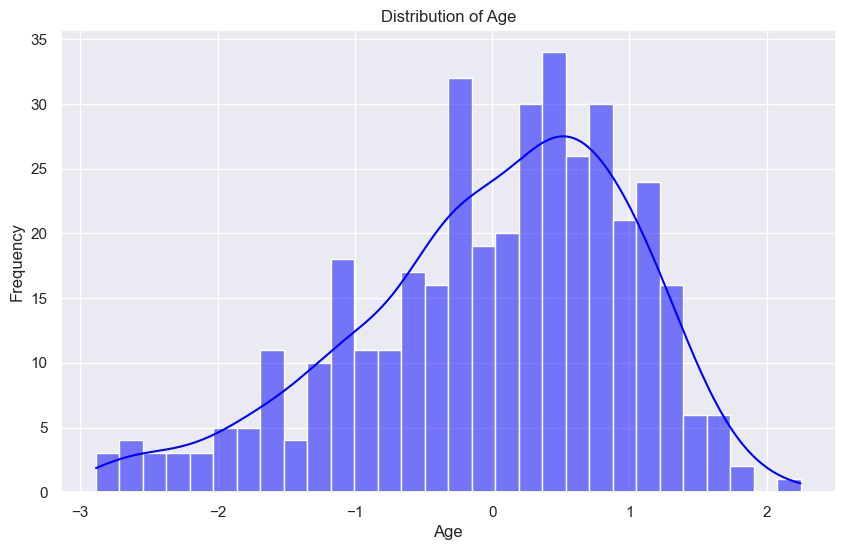

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(X['age'], kde=True, color="blue", bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Variables and Data Types:
- The dataset now consists of 26 columns, including both original and derived features.
- Numerical Features: age, bp, sg, al, su, bgr, bu, sc, sod, pot, hemoand 3 corrected numerical features pcv, wc, rc. 
- Categorical Features: rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane.
- Target Variable: The classification variable, which indicates whether a patient has chronic kidney disease (ckd) or not, is the primary target for prediction.

Observation Counts:
The dataset comprises 400 entries. 

Distubution:
From the graph we can see, the age of this data set is left skewed.

### Question 4

Text(0.5, 1.0, 'Heatmap of Association Between Numeric Predictors')

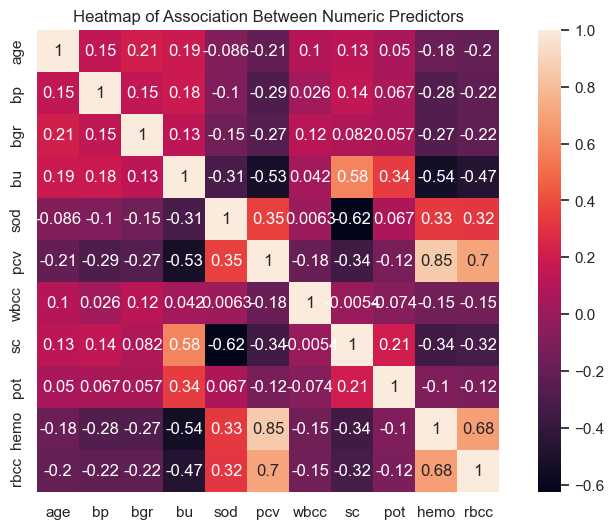

In [13]:
X_float = X[num_col]
X_float = X_float.apply(lambda x: x.fillna(x.mean()),axis = 0)

corrlation_mat = X_float.corr()

sns.heatmap(corrlation_mat,annot = True, cbar = True, square = True)
plt.title('Heatmap of Association Between Numeric Predictors')

The heatmap shows a strong postive correlation between hemolobin and packed cell volume, with a correlation coefficient of 0.85. This suggests that as hemoglobin levels increase, packed cell volume tends to increase as weel. We also notice that the variable blood urea has a strong negative correlation with hemoglobin with a coefficient of -0.54, indicating that the as blood urea levels increases, the hemoglobin levels decreases.

### Question 5

In [14]:
pd.DataFrame(X.isna().sum()).T

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,9,12,47,46,49,152,65,4,4,44,19,17,87,88,52,71,106,131,2,2,2,1,1,1


We notice there every predictor variables contains `Nan` values where the variable `rbc` contains the most `Nan` of 152, where there are 12 out of 24 predictors contain more than 40 `Nan` values. By earlier investigation, we are aware of we only have 400 observations, where we cannot simply drop these `Nan` from the dataset as this will possibly drop half of the observations. Instead, we want to fill the `Nan` with the median of each predictor variables.

In [15]:
X.select_dtypes(include={float})

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,-0.203139,0.258373,-0.341498,-0.424804,-0.326574,NaN,NaN,0.988022,0.569881,-0.206202,0.481295
1,-2.594124,-1.936857,NaN,-0.781687,-0.396338,NaN,NaN,-0.421688,-0.098536,-0.818559,NaN
2,0.613295,0.258373,3.473064,-0.087748,-0.221928,NaN,NaN,-1.006202,-0.878356,-0.308261,NaN
3,-0.203139,-0.473370,-0.392022,-0.028268,0.126891,-2.552778,-0.667102,-0.456071,-0.766953,-0.580420,-0.788961
4,-0.028189,0.258373,-0.530963,-0.623073,-0.291692,NaN,NaN,-0.318538,-0.432744,-0.376301,-0.104977
...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,-0.101509,-0.167055,-0.448661,1.200069,0.085536,1.091172,0.904090,-0.580420,0.188159
396,-0.553039,-0.473370,-0.922524,-0.523939,-0.326574,0.334027,-0.353503,1.366237,1.683910,-0.206202,1.458415
397,-2.302541,0.258373,-0.606749,-0.623073,-0.431220,-0.050880,-0.071263,1.125555,1.126896,-0.614440,0.676719
398,-2.010957,-1.205114,-0.429915,-0.147229,-0.361456,-0.243334,0.085536,0.575424,1.349701,-0.410321,1.165279


In [16]:
X.select_dtypes(include={'category'}).mode()

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,1.02,0.0,0.0,1,1,0,0,0,0,0,1,0,0


In [17]:
for type in [float, 'category']:
    cols = X.select_dtypes(include=[type]).columns
    if type is float:
        X[cols] = X[cols].fillna(X[cols].median())
    else:
        print(X[cols].mode())
        X[cols] = X[cols].fillna(X[cols].mode().iloc[0])

     sg   al   su rbc pc pcc ba htn dm cad appet pe ane
0  1.02  0.0  0.0   1  1   0  0   0  0   0     1  0   0


In [18]:
print(X.isna().sum().sum())

0


### Question 6

We can only perform outlier analysis on the numerical predictor variables, and we want to plot a boxenplot to firstly visualize if there any obvious outliers exists in the dataset.

Text(0, 0.5, 'Value')

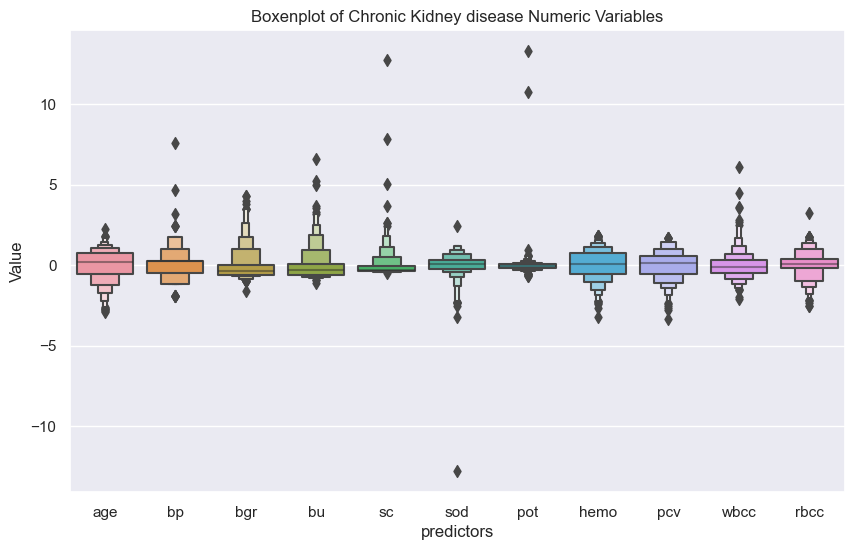

In [19]:
sns.boxenplot(X)
plt.title('Boxenplot of Chronic Kidney disease Numeric Variables')
plt.xlabel('predictors')
plt.ylabel('Value')

In [20]:
outlier_res = pd.DataFrame()
count_raw, count_dup = [], []
X_float_column = X.select_dtypes(include=[float]).columns
X_temp = X
for col in X_float_column:
    count_dup.append((np.abs(X_temp[col]) >= 3).sum())
    count_raw.append((np.abs(X_temp[col]) >= 3).sum())
    X_temp = X_temp[X_temp[col] <= 3]
outlier_res = pd.DataFrame([count_raw, count_dup])
outlier_res.columns = X_float_column
outlier_res.index = ['raw', 'Independent']
outlier_res

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
raw,0,3,10,9,3,0,1,0,0,4,1
Independent,0,3,10,9,3,0,1,0,0,4,1


In [21]:
outlier_res.sum(axis=1)

raw            31
Independent    31
dtype: int64

Since these outlier are independently existon each variables, which comes to a total of 31 outliers in the dataset and it is 7.75% of the observations. Thus, instead of dropping them, we want to cap the outliers with the percentiles.

In [22]:
for col in X_float_column:
    X[col] = np.where(
        np.abs(X[col]) >= 3,
        np.quantile(X[col], 0.95),
        X[col]
    )

### Question 7

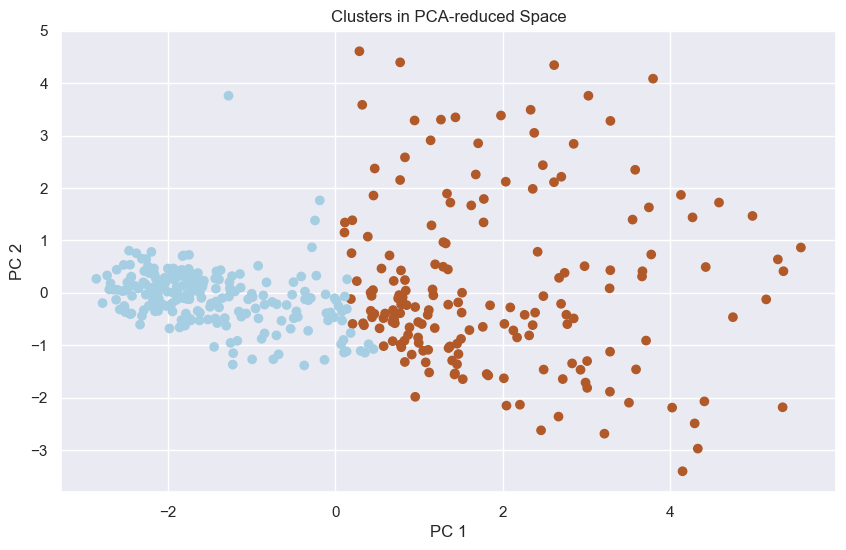

In [23]:
pca_X = PCA()
pca_loadings = pd.DataFrame(pca_X.fit(X).components_.T, index = X.columns)

pca_scores = pd.DataFrame(pca_X.fit_transform(X), index = X.index)

kmeans = KMeans(n_clusters=2,n_init=20,random_state=42)
kmeans.fit(X)

pd.Series(kmeans.labels_).value_counts()

# plt.scatter(pca_scores[0],pca_scores[1], cmap = 'Paired',c=kmeans.labels_)
plt.scatter(pca_scores[0],pca_scores[1], cmap = 'Paired',c=kmeans.labels_)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters in PCA-reduced Space')
plt.show()

We have used PCA to reduce the dimensions of the dataset performed K-means clustering, and visualized the data points in the axis of the first two components of the PCA. We noticed that one cluster is centred around the lower values of PC 1 and spans a narrow range of PC 2 values, while the other is centred around higher values of PC 1 and spans a wide range of PC 2 values. We also noticed there is overlap between the clusters around the (0, 0) coordinate on the PC 1 and PC2 axes, this suggests that for some observations, the most dominant patterns are not entirely distinct. This pattern might not captured by the first two components yet as these observations share common characteristics with both clusters, and we possibly need more components for better predictions.

### Question 8

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3, 
    random_state=1
    )

In [25]:
print(X_train.shape, X_test.shape)

(280, 24) (120, 24)


### Question 9

For this classification problems, we want to employ the Logistic Regression and Decision Tree classidiers. Logistic Regression is a straightforward model that attempts to find a linear decision boundary to separate the classes. At its core, it models the probability of an instance belonging to one class or the other using the logistic sigmoid function. This function takes a linear combination of the input features and maps it to a value between 0 and 1, representing the predicted probability of the positive class. We can learn also the relative importance of each feature through the modelled coefficient weights.

Decision trees offer a powerful and flexible approach to classification and regression tasks. They work by recursively partitioning the feature space into smaller regions based on a series of binary splits. At each internal node of the tree, a single feature and a split point on that feature are chosen to maximize the separation between the classes or minimize the impurity of the resulting subsets. It also has a strong ability to capture complex, nonlinear relationships in the data without making any assumptions about the underlying distribution, which suitable to capture pattern in out high-dimnesional datasets.

### Question 10

We have chosen confusion matrix/Accuracy and adjusted Rand index(ARI) as the two metrics to compare the performance of the classifiers. 

The confusion matrix is a matrix which tells us how well a classifier is performing. It consists of four parts, true positives on the top left, false positives on the top right, false negatives on the bottom left, and true positives on the bottom right. To extend, the true positives are the count of the positive values being correctly labelled in the predicted set, and false positives are the count of the negative values being incorrectly labelled as positive in the predicted set, and vice versa. The goal is to attempt to obtain a high number on the diagonal, and a low number close to 0 or even 0 off the diagonal. To compute the accuracy, we want to use the sum of the diagonal values (true positives count and true negatives count) over the total number of observations.

The Adjusted Rand Index (ARI) is a metric used to evaluates how well a clustering algorithm's predicted clusters match the true groups or labels in the data. It ranges from -1 to 1, where higher scores indicate better agreement between predicted and true clusters. A score of 1 means perfect clustering, 0 implies random clustering, and negative scores suggest worse than random performance. The adjusted rand score accounts for the possibility of random chance, making it a reliable measure of clustering accuracy compared to the actual data structure.

### Question 11 & Question 12

#### Logistics Regression

In [26]:
## Logistics Regression
logisticRegr = LogisticRegression(max_iter=1000)

In [27]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
pred_prod = logisticRegr.predict_proba(X_test)

In [29]:
test_pred = pd.DataFrame(
    data = {'y_test': y_test.values.flatten(),
            'prob_raw': pred_prod[:, 1]
            }
)

test_pred['pred_raw'] = test_pred.prob_raw.map(lambda x: 1 if x > 0.5 else 0)

Instead of using cut off values of 0.5, we want to perform the ROC analysis to find the optimal cut-off values.

The AUC values is 0.9925714285714285.


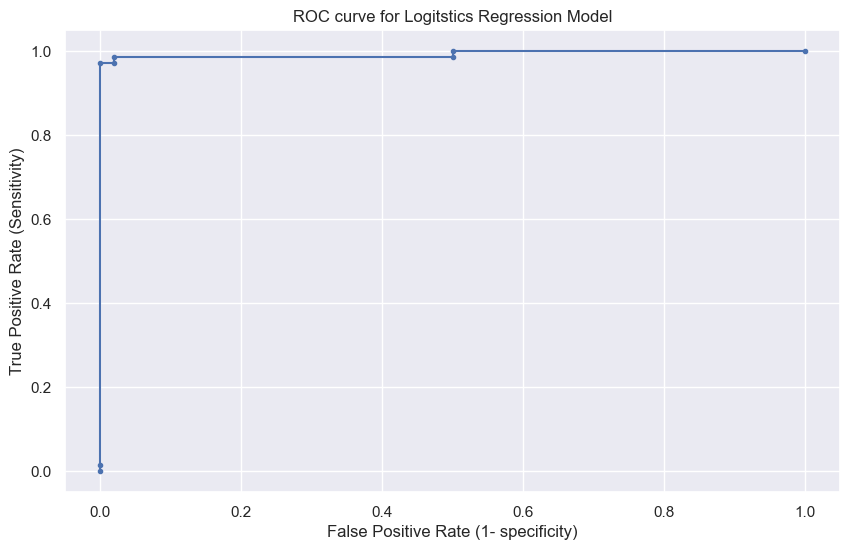

In [30]:
fpr, tpr, thresholds = roc_curve(test_pred.y_test, test_pred.prob_raw)
# AUC
print(f'The AUC values is {roc_auc_score(test_pred.y_test, test_pred.prob_raw)}.')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate (1- specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve for Logitstics Regression Model')
plt.show()

In [31]:
j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]
print(f"The optimal cut-off for the heart disease dataset is {optimal_threshold}.")

The optimal cut-off for the heart disease dataset is 0.41536669854062064.


In [32]:
test_pred['pred_opt'] = test_pred.prob_raw.map(lambda x: 1 if x > optimal_threshold else 0)

#### Decision Tree

In [33]:
## Decision Tree
decision_tree = DecisionTreeClassifier(
    max_depth=24,
    random_state=42
)

In [34]:
path = decision_tree.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = [] # save fitted trees with different alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=42, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)
depth = [clf.tree_.max_depth for clf in clfs]
# depth = list(set(depth))
depth

[6, 5, 3, 3, 2, 1, 0]

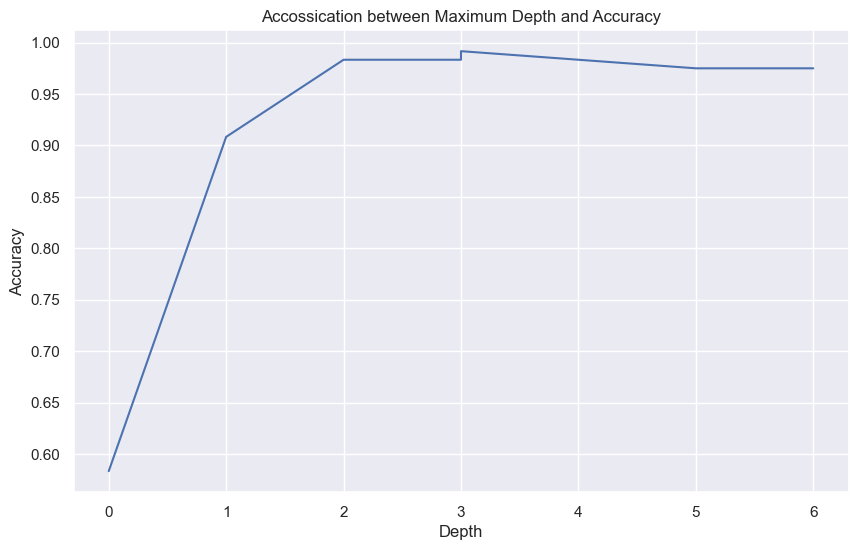

In [35]:
test_score = [clf.score(X_test, y_test) for clf in clfs]
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accossication between Maximum Depth and Accuracy')
plt.show()

In [36]:
# acc_score = []
# for depth in range(1, 25):
#     decision_tree = DecisionTreeClassifier(
#         max_depth=depth,
#         random_state=42
#     )

#     decision_tree.fit(X_train, y_train)
#     acc_score.append(decision_tree.score(X_test, y_test))

# acc_score = pd.DataFrame({
#     'Depth': range(1, 25),
#     'Accruacy': acc_score
# })

# sns.lineplot(acc_score, x='Depth', y='Accruacy').set(xticks=acc_score.Depth.values)
# sns.scatterplot(acc_score, x='Depth', y='Accruacy')

The accuact is maximum at depth 3.

In [37]:
## Decision Tree
decision_tree = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

In [38]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [39]:
test_pred['pred_tree'] = decision_tree.predict(X_test)

Text(0.5, 1.0, 'Decision Tree with maximum depth 3 - Train data')

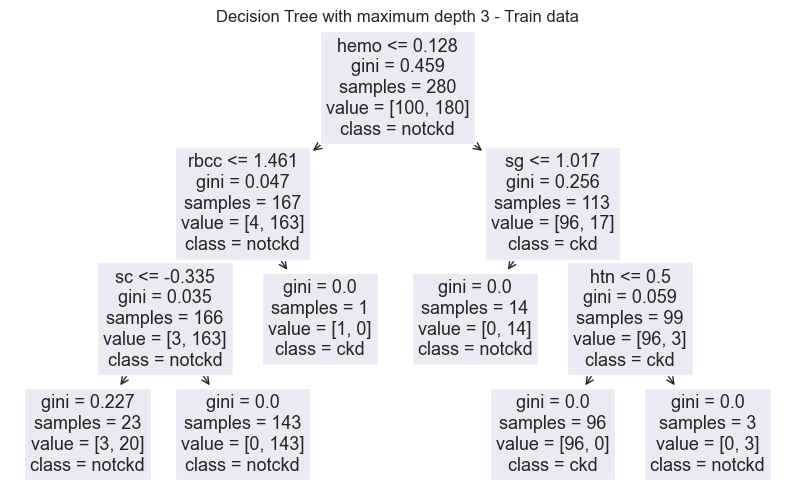

In [40]:
plot_tree(
    decision_tree,
    max_depth=3,
    feature_names=X.columns.tolist(),
    class_names=['ckd', 'notckd']
)
plt.title("Decision Tree with maximum depth 3 - Train data")

#### Comparison

In [41]:
## confusion matrix
### raw
conf_mat = confusion_matrix(test_pred.y_test, test_pred.pred_raw, labels=[0, 1])
cm = pd.DataFrame(conf_mat, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
print(f'Confusion Matrix for raw prediction: \n\n {cm}')

total = sum(sum(conf_mat))
accuracy = (conf_mat[0, 0]+conf_mat[1, 1])/total
print(f'The accuary of the model is {round(accuracy*100, 2)}%.')

### auc
conf_mat = confusion_matrix(test_pred.y_test, test_pred.pred_opt, labels=[0, 1])
cm = pd.DataFrame(conf_mat, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
print(f'Confusion Matrix for raw prediction: \n\n {cm}')

total = sum(sum(conf_mat))
accuracy = (conf_mat[0, 0]+conf_mat[1, 1])/total
print(f'The accuary of the model is {round(accuracy*100, 2)}%.')


### tree
conf_mat = confusion_matrix(test_pred.y_test, test_pred.pred_tree, labels=[0, 1])
cm = pd.DataFrame(conf_mat, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
print(f'Confusion Matrix for decison tree: \n\n {cm}')

total = sum(sum(conf_mat))
accuracy = (conf_mat[0, 0]+conf_mat[1, 1])/total
print(f'The accuary of the model is {round(accuracy*100, 2)}%.')

Confusion Matrix for raw prediction: 

 Predicted  notckd  ckd
True                  
notckd         50    0
ckd             5   65
The accuary of the model is 95.83%.
Confusion Matrix for raw prediction: 

 Predicted  notckd  ckd
True                  
notckd         50    0
ckd             3   67
The accuary of the model is 97.5%.
Confusion Matrix for decison tree: 

 Predicted  notckd  ckd
True                  
notckd         49    1
ckd             0   70
The accuary of the model is 99.17%.


In [42]:
## rand score
### raw
print(f"The adjusted Rand index for raw logitstic regression is {adjusted_rand_score(test_pred.y_test, test_pred.pred_raw)}.")

### opt
print(f"The adjusted Rand index for optimal logitstic regression is {adjusted_rand_score(test_pred.y_test, test_pred.pred_opt)}.")

### tree
print(f"The adjusted Rand index for decision tree is {adjusted_rand_score(test_pred.y_test, test_pred.pred_tree)}.")


The adjusted Rand index for raw logitstic regression is 0.8389399972538789.
The adjusted Rand index for optimal logitstic regression is 0.901670411038665.
The adjusted Rand index for decision tree is 0.9666499980767012.


We have used the performance matrix confusion matrix/Accruacy and the adjusted Rand index to evaluate the performance of the two models. We noticed that the decision tree method obtained the highest accuracy of 99.17% which is 1.5% higher than using logistics regression. In other words, the decision tree has only mispredicted 1 observation while logistic regression had mispredicted 3 observations in the test set. We also see that logistic regression might be a better predictive method for patients who has no Chronic Kidney disease as it predicted all patient who has no Chronic Kidney disease correctly in both raw prediction and optimal prediction. On the other hand, decision tree might be a better predictive method for patient who has Chronic Kidney disease.

By looking at the adjusted Rand index value, the decision tree again had the highest ARI of 0.966, whereas logistic regression had 0.902. Both ARI are very close to 1, indicating a very high level of agreement between the cluster assignments and the true labels as a value of 1 in ARI indicates a perfect agreement between the true label and the predicted label. To conclude, this high ARI and high accuracy indicated the logistic regression model and decision tree model are meaningful and capable of explaining the Chronic Kidney Disease dataset.

### Question 13

In [43]:
model = sm.Logit(y, X).fit(method='bfgs')
model.summary()
# model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit_regularized(L1_wt=0.0, alpha=0.1)
# model.summary()

         Current function value: 0.038027
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  400
Model:                          Logit   Df Residuals:                      376
Method:                           MLE   Df Model:                           23
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.9425
Time:                        21:03:47   Log-Likelihood:                -15.211
converged:                      False   LL-Null:                       -264.63
Covariance Type:            nonrobust   LLR p-value:                 6.186e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.6655      0.762     -0.874      0.382      -2.159       0.827
bp             0.0713      0.622      0.115      0.909      -1.149       1.291
sg             3.2324     10.630      0.304      0.761     -17.602      24.067
al             7.0412      3.312      2.126      0.034       0.549      13.533
su             3.5266     31.785      0.111      0.912     -58.770      65.824
rbc            0.0234      9.420      0.002      0.998     -18.440      18.487
pc             0.8473      3.420      0.248      0.804      -5.856       7.551
pcc            0.6102    522.243      0.001      0.999   -1022.967    1024.188
ba             0.2641   1336.130      0.000      1.000   -2618.503    2619.032
bgr            1.6603      2.757      0.602      0.547      -3.744       7.065
bu            -0.1315      3.389     -0.039      0.969      -6.774       6.511
sc             4.3851      3.388      1.294      0.196      -2.255      11.025
sod           -1.5232      1.661     -0.917      0.359      -4.779       1.733
pot           -0.2660      5.431     -0.049      0.961     -10.910      10.378
hemo          -5.7279      3.031     -1.890      0.059     -11.669       0.213
pcv           -3.2977      2.464     -1.338      0.181      -8.127       1.532
wbcc          -1.7382      1.757     -0.989      0.322      -5.181       1.705
rbcc          -2.7475      2.616     -1.050      0.294      -7.875       2.380
htn            4.3932      9.103      0.483      0.629     -13.448      22.235
dm             4.4664      5.323      0.839      0.401      -5.967      14.900
cad            0.5182    523.485      0.001      0.999   -1025.494    1026.530
appet         -1.1685      2.611     -0.448      0.654      -6.286       3.949
pe             2.6197      3.884      0.675      0.500      -4.992      10.232
ane            1.6688      4.918      0.339      0.734      -7.970      11.308
==============================================================================

Possibly complete quasi-separation: A fraction 0.70 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

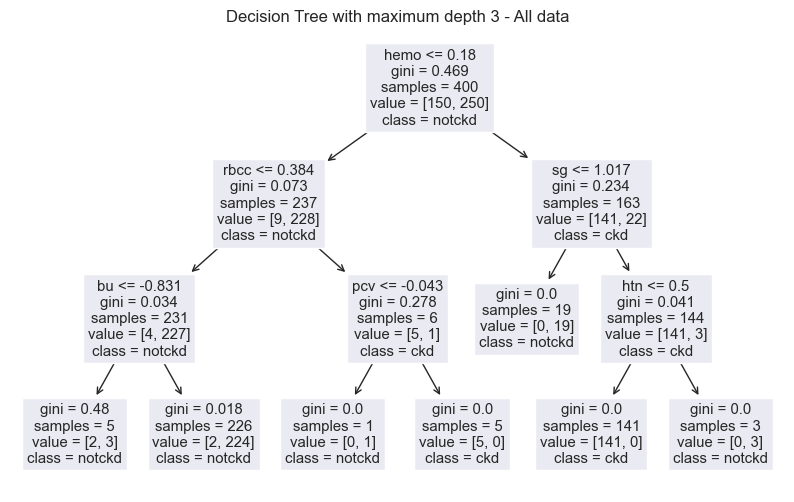

In [44]:
## tree
decision_tree = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
decision_tree.fit(X, y)
plot_tree(
    decision_tree,
    max_depth=3,
    feature_names=X.columns.tolist(),
    class_names=['ckd', 'notckd']
)
plt.title("Decision Tree with maximum depth 3 - All data")
plt.show()

We have retrained all interpretable classifiers with all available data to find the significance of each predictor variable. However, since the Logistics Regression method in `sklearn` does not provide the model summary, and using newton methods in the Logistics Regression method in `statsmodels` is not converged even with a high maximum iteration number, we have decided to use `bfgs` methods in `statsmodels` to give us an overview of the significance of the predictor variables. Please note that the model is not converged, meaning the coefficient or the summary is under the best estimate yet, but we can use it as a reference. 

In logistic regression, we often look for the variables with large coefficients in both magnitudes. We notice that variable serum creatinine has the largest coefficient of 4.4464, where hyperextension and diabetes mellitus followed closely with values of 4.3932 and 4.3851 correspondly. This positive coefficient indicates that as the predictor variable increases, the log odds of the outcome variable also increase. In other words, higher values of the predictor are associated with a higher probability of a positive outcome. We also noticed that hemoglobin has the smallest coefficient of -5.7279, where followed by packed cell volume with a value of -3.2977. These indicate higher values of the predictor are associated with a lower probability of a positive outcome. Thus, these are considered as the most significant variable in the logistics regression classifier.

In the decision tree plot, we are aware that the decision tree used hemoglobin, red blood cell count, specific gravity, blood urea, packed cell volume, and hypertension as the variables at the nodes to predict the disease, as they considered these variables to be the most significant. We notice that the two methods shared some of the common significant variables in predicting such as hemoglobin, packed cell volume, and hypertension. However, for variable blood urea, it was not considered as important in both magnitudes in logistics regressions as it only has a coefficient of -0.1315. 

### Question 16

The GitHub repo link is [Stats-3DA3](https://github.com/Henzhwang/Stats-3DA3.git) for Group 22 in Section C02.

\newpage

## Team Contributions

Yishuang Meng has contributed to Question 1, 2, 3, 4, and 7.

Yuren Wang has contributed to Question 6, 8, 9, and 10.

Shiheng Huang has contribued to Question 11, 12, 13, and 16.

\newpage

## Reference